# Анализ перспективности тарифов связи

## Цель проекта
Сделать вывод, какой тариф, объективно, лучше

## Имеющиеся данные
1. Файл с даннымы о тарифах
2. Файл с даннымы пользователях
3. Файлы с даннымы звонках, сообщениях и об интернет-сессиях

## Содержание
<h3>Шаг 1.<a href='#session1'>Изучение общей информации</a></h3>
<h3>Шаг 2.<a href='#session2'>Подготовка данных</a></h3>
<h4>Шаг 2.1<a href='#session2.1'>Приведение типов</a></h4>
<h4>Шаг 2.2<a href='#session2.2'>Исправление ошибок в данных</a></h4>
<h4>Шаг 2.3<a href='#session2.3'>Подсчет данных по каждому пользователю:</a></h4>
<h5>Шаг 2.3.1<a href='#session2.3.1'>Количество сделанных звонков и израсходованных минут разговора, объема трафика и сообщений  по месяцам</a></h5>
<h5>Шаг 2.3.4<a href='#session2.3.2'>Помесячная выручка с каждого пользователя</a></h5>
<h3>Шаг 3.<a href='#session3'>Анализ данных</a></h3>
<h3>Шаг 4.<a href='#session4'>Проверка гипотез</a></h3>
<h4>Шаг 4.1<a href='#session4.1'>средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a></h4>
<h4>Шаг 4.2<a href='#session4.2'>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></h4>
<h4>Шаг 4.3<a href='#session4.3'>Формулировка нулевой и альтернативной гипотез</a></h4>
<h4>Шаг 4.4<a href='#session4.4'>Выбор критерия проверки гипотез</a></h4>
<h3>Шаг 5.<a href='#session5'>Общий вывод</a></h3>


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<a id = 'session1'></a>
### Изучение общей информации

In [2]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')


In [3]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls_data.duplicated().sum()

0

In [5]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
internet_data.duplicated().sum()

0

In [7]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages_data.duplicated().sum()

0

In [9]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users_data.duplicated().sum()

0

### Вывод
В типах данных есть неточности и ошибки  
Дубликатов в таблицах нет

<a id = 'session2'></a>
### Подготовка данных

<a id = 'session2.1'></a>
#### Приведение типов

In [12]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format = '%Y-%m-%dT%H:%M:%S') #Преобразовали в дату
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month
calls_data['user_id'] = calls_data['user_id'].astype('str') # user_id это не количественная переменная
calls_data['duration'] = calls_data['duration'].apply(np.ceil) # Округлили длительность разоворов - из задания(«Мегалайн» всегда округляет вверх значения минут и мегабайтов.)
calls_data['duration'] = calls_data['duration'].astype('int')

In [13]:
messages_data['user_id'] = messages_data['user_id'].astype('str')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%dT%H:%M:%S')
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month


In [14]:
internet_data['user_id'] = internet_data['user_id'].astype('str')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%dT%H:%M:%S') #Преобразовали в дату
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil) # Округлили трафик - из задания(«Мегалайн» всегда округляет вверх значения минут и мегабайтов.)
internet_data['mb_used'] = internet_data['mb_used'].astype('int')

In [15]:
users_data['user_id'] = users_data['user_id'].astype('str')

### Вывод
1. Заменины строковые столбцы на дату, там, где это требовалось
2. Округлены потраченные mb и минуты трафика
3. Дубликатов необнаружено
4. Поопущенных значений не обнаружено, кроме обоснованных в users_data['churn_date']

<a id = 'session2.2'></a>
#### Исправление ошибок в данных

In [16]:
internet_data.drop(['Unnamed: 0'], axis = 1, inplace = True) # Удалили столбец, дублирующий index таблицы

In [17]:
calls_data.drop(calls_data[calls_data['duration'] == 0].index, inplace=True)

In [18]:
internet_data.drop(internet_data[internet_data['mb_used'] == 0].index, inplace=True)

#### Вывод
В таблице internet_data был удален столбец 'Unnamed: 0', так как он ненесет полезной информации и просто дублирует индекс  
В столбце used_mb таблицы internet_data были удалены нулевые значения, так как нам важно количество потраченных Мб, а не количество 'неудачных' подключений к сети.  
В столбце duration таблицы calls_data были удалены нулевые значения. Если звонок не прошел по той или иной причине, его не стоит включать а рачет количества сделанных звонков и тем более он ненесет информации о длительности разговора.

<a id='session2.3'></a>
#### Подсчет данных по каждому пользователю

<a id = 'session2.3.1'></a>
##### Количество сделанных звонков и израсходованных минут разговора, объема трафика и сообщений  по месяцам

In [19]:
# Делаем сводные таблыцы
calls_data_pivot = calls_data.pivot_table(index = ['user_id','month'],values = 'duration',aggfunc = ['sum','count']) 
messages_data_pivot = messages_data.pivot_table(index = ['user_id','month'],values = 'id',aggfunc = 'count')
internet_data_pivot = internet_data.pivot_table(index = ['user_id','month'],values = 'mb_used',aggfunc = 'sum')
users_data_pivot = users_data.pivot_table(index = ['user_id'],values = 'tariff',aggfunc = 'sum')
# Объединяем таблицы по полю user_id
cal_mes = calls_data_pivot.reset_index().merge(messages_data_pivot, on = ['user_id','month'],how='outer')
cal_mes_inet = cal_mes.merge(internet_data_pivot, on = ['user_id','month'],how='outer')
cal_mes_inet_user = cal_mes_inet.merge(users_data_pivot, on = 'user_id')
cal_mes_inet_user.drop('user_id', axis = 1, inplace = True)
cal_mes_inet_user.drop('month', axis = 1, inplace = True)
cal_mes_inet_user.rename(columns={'tariff':'tariff_name'}, inplace = True)
# Присоединяем таблицу тарифов
cal_mes_inet_user_tarif = cal_mes_inet_user.merge(tariffs_data, on='tariff_name')

In [20]:
cal_mes_inet_user_tarif.rename(columns={'id':'sms_count',('user_id',''):'user_id',('month',''):'month',('sum','duration'):'duration_sum',('count','duration'):'calls_count'},inplace=True)

In [21]:
cal_mes_inet_user_tarif.dropna(subset = ['user_id','month'], inplace = True)
cal_mes_inet_user_tarif = cal_mes_inet_user_tarif.fillna(0) # заполним пропуска в mb_esed duration_sum sms_count нулями

In [22]:
cal_mes_inet_user_tarif

,user_id,month,duration_sum,calls_count,sms_count,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,17.0,22.0,2256.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,28.0,60.0,23257.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,41.0,75.0,14016.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,42.0,81.0,14070.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,46.0,57.0,14581.0,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1498,10.0,247.0,30.0,42.0,20604.0,smart,50,15360,500,550,200,3,3
3205,1499,9.0,70.0,8.0,11.0,1848.0,smart,50,15360,500,550,200,3,3
3206,1499,10.0,449.0,44.0,48.0,17809.0,smart,50,15360,500,550,200,3,3
3207,1499,11.0,612.0,62.0,59.0,17984.0,smart,50,15360,500,550,200,3,3


<a id='session2.3.2'></a>
##### Помесячная выручка с каждого пользователя

In [23]:
# Создали таблицу с требуемыми для расчета данными
data_result = cal_mes_inet_user_tarif[['user_id','month','tariff_name','rub_monthly_fee','duration_sum','minutes_included','rub_per_minute'\
                                       ,'mb_used','mb_per_month_included','rub_per_gb'\
                                       ,'sms_count','messages_included','rub_per_message']]
# Вычислим, сколько потратил абонент из пакета услуг
data_result['minutes_paid'] = (data_result['duration_sum']-data_result['minutes_included'])*data_result['rub_per_minute']
data_result['sms_paid'] = (data_result['sms_count']-data_result['messages_included'])*data_result['rub_per_message']
data_result['gb_paid'] = (data_result['mb_used']-data_result['mb_per_month_included'])*data_result['rub_per_gb']



In [24]:
# Обнуляем отрицательные значения, чтобы не получилось 'переплаты'
data_result.loc[data_result['minutes_paid'] < 0, 'minutes_paid'] = 0
data_result.loc[data_result['sms_paid'] < 0, 'sms_paid'] = 0
data_result.loc[data_result['gb_paid'] < 0, 'gb_paid'] = 0

In [25]:
# Считаем доход с клиента в месяц
data_result['revenue'] = (data_result['minutes_paid'] * data_result['rub_per_minute'] +
                   data_result['gb_paid']  * data_result['rub_per_gb'] +
                   data_result['sms_paid'] * data_result['rub_per_message'] + data_result['rub_monthly_fee'])
print(data_result)

     user_id  month tariff_name  rub_monthly_fee  duration_sum  \
0       1000    5.0       ultra             1950         159.0   
1       1000    6.0       ultra             1950         172.0   
2       1000    7.0       ultra             1950         340.0   
3       1000    8.0       ultra             1950         408.0   
4       1000    9.0       ultra             1950         466.0   
...      ...    ...         ...              ...           ...   
3204    1498   10.0       smart              550         247.0   
3205    1499    9.0       smart              550          70.0   
3206    1499   10.0       smart              550         449.0   
3207    1499   11.0       smart              550         612.0   
3208    1499   12.0       smart              550         492.0   

      minutes_included  rub_per_minute  mb_used  mb_per_month_included  \
0                 3000               1   2256.0                  30720   
1                 3000               1  23257.0            

<a id = 'session3'></a>
#### Анализ данных

In [26]:
# Сделаем срез по тарифу
tariff_ultra = data_result.query('tariff_name == "ultra"')
tariff_smart = data_result.query('tariff_name == "smart"')

##### Опишем длительность разговора по тарифам

In [27]:
print(tariff_ultra['duration_sum'].describe())
print('Дисперсия тарифа ultra:',np.var(tariff_ultra['duration_sum'], ddof=1))
print()
print(tariff_smart['duration_sum'].describe())
print('Дисперсия тарифа smart:',np.var(tariff_smart['duration_sum'], ddof=1))

count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: duration_sum, dtype: float64
Дисперсия тарифа ultra: 93338.42829141095

count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: duration_sum, dtype: float64
Дисперсия тарифа smart: 35718.128533936906


##### Вавод
Полльзователи тарифа ultra разговаривают на 32% дольше, но и отклонеение сильнее на 65%.

##### Опишем количество используемого трафика

In [28]:
print(tariff_ultra['mb_used'].describe())
print('Дисперсия тарифа ultra:',np.var(tariff_ultra['mb_used'], ddof=1))
print()
print(tariff_smart['mb_used'].describe())
print('Дисперсия тарифа smart:',np.var(tariff_smart['mb_used'], ddof=1))

count      947.000000
mean     19489.672650
std      10137.035902
min          0.000000
25%      11633.500000
50%      19335.000000
75%      26867.000000
max      49789.000000
Name: mb_used, dtype: float64
Дисперсия тарифа ultra: 102759496.8758157

count     2221.000000
mean     16231.462404
std       5883.447131
min          0.000000
25%      12672.000000
50%      16527.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64
Дисперсия тарифа smart: 34614950.145094946


##### Вывод
Пользователи тарифа ultra тратят на 20% больше трафика, отклонение больше на 66%.

##### Опишем количество отправленных сообщений

In [29]:
print(tariff_ultra['sms_count'].describe())
print('Дисперсия тарифа ultra:',np.var(tariff_ultra['sms_count'], ddof=1))
print()
print(tariff_smart['sms_count'].describe())
print('Дисперсия тарифа smart:',np.var(tariff_smart['sms_count'], ddof=1))

count    947.000000
mean      48.759240
std       46.601785
min        0.000000
25%        5.000000
50%       39.000000
75%       78.500000
max      224.000000
Name: sms_count, dtype: float64
Дисперсия тарифа ultra: 2171.7263283853986

count    2221.000000
mean       33.392166
std        28.270233
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: sms_count, dtype: float64
Дисперсия тарифа smart: 799.2060467040657


##### Вывод
Пользоватлеи тарифа ultra отправляют на 58% больше сообщений, отклонение больше на 66%

In [30]:
print(tariff_ultra['revenue'].describe())
print('Дисперсия тарифа ultra:',np.var(tariff_ultra['revenue'], ddof=1))
print()
print(tariff_smart['revenue'].describe())
print('Дисперсия тарифа smart:',np.var(tariff_smart['revenue'], ddof=1))

count    9.470000e+02
mean     1.719625e+07
std      5.531878e+07
min      1.950000e+03
25%      1.950000e+03
50%      1.950000e+03
75%      1.950000e+03
max      4.290544e+08
Name: revenue, dtype: float64
Дисперсия тарифа ultra: 3060167875904102.0

count    2.221000e+03
mean     1.109490e+08
std      1.443544e+08
min      5.500000e+02
25%      5.500000e+02
50%      4.668075e+07
75%      1.883212e+08
max      9.300054e+08
Name: revenue, dtype: float64
Дисперсия тарифа smart: 2.083818438355919e+16


##### Построим гистограммы

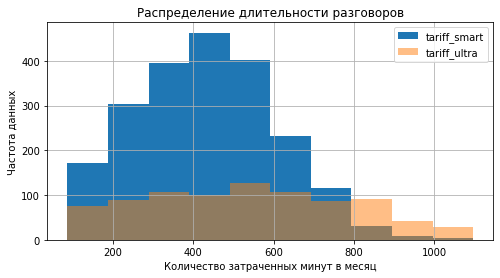

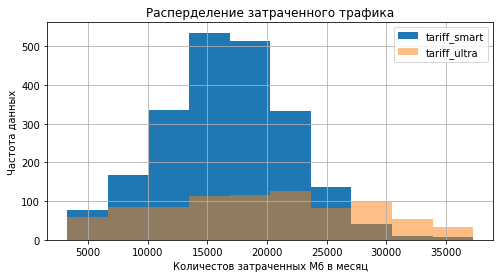

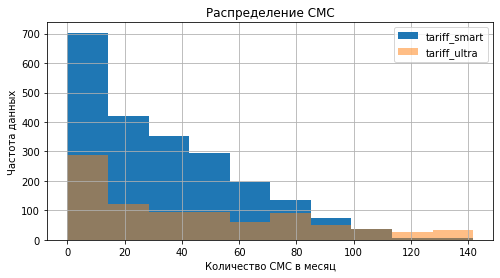

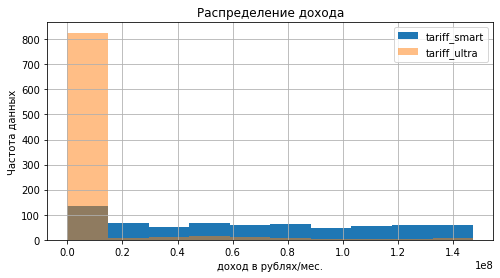

In [31]:
table_title = {'duration_sum':'Распределение длительности разговоров','mb_used':'Расперделение затраченного трафика','sms_count':'Распределение СМС','revenue':'Распределение дохода'}
table_name = {'duration_sum':'Количество затраченных минут в месяц','mb_used':'Количестов затраченных Мб в месяц','sms_count':'Количество СМС в месяц','revenue':'доход в рублях/мес.'}
for i in table_title:
    q1 = tariff_smart[i].quantile(0.05)                 
    q3 = tariff_smart[i].quantile(0.95)
    q1 = tariff_ultra[i].quantile(0.05)                 
    q3 = tariff_ultra[i].quantile(0.95)
    tariff_smart[i].plot(kind = 'hist', bins = 10, range = (q1,q3),grid=True, figsize = (8,4))
    tariff_ultra[i].plot(kind = 'hist', bins = 10, range = (q1,q3),grid=True, figsize = (8,4), alpha = 0.5)
    plt.ylabel('Частота данных')
    plt.xlabel(table_name[i])
    plt.title(table_title[i])
    plt.legend(['tariff_smart','tariff_ultra'])
    plt.show()

#### Вывод
Многие пользвоатели тарифа **ultra** переоценивают свои потребности в сязи, используют мощный тариф не на полную  
Пользователи тарифа **smart** наоборот часто выходят за замки лимитов по минутам и трафику

<a id='session4'></a>
#### Проверка гипотез

<a id = 'session4.1'></a>
##### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [32]:
alpha = 0.05
result = st.ttest_ind(tariff_smart['revenue'],tariff_ultra['revenue'], equal_var = False)
print('p-value = ',result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  7.444927225314416e-139
Отвергаем нулевую гипотезу


#### Вывод
Да, средняя выручка тарифов отличается

<a id='session4.2'></a>
#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [33]:
data_result_city = data_result.merge(users_data, on ='user_id')

In [34]:
print('Средняя выручка пользователей из Москвы:{:.2f}'.format(data_result_city.loc[data_result_city['city']=='Москва']['revenue'].mean()))
print('Средняя выручка пользователей из других городов:{:.2f}'.format(data_result_city.loc[data_result_city['city']!='Москва']['revenue'].mean()))

Средняя выручка пользователей из Москвы:71584803.24
Средняя выручка пользователей из других городов:85627807.56


In [35]:
city_mos= data_result_city.query('city=="Москва"')
city_others = data_result_city.query('city != "Москва"')

In [36]:
print('Дисперсия дохода с Москвы:',np.var(city_mos['revenue'], ddof=1))
print('Дисперсия дохода с городов:',np.var(city_others['revenue'], ddof=1))

Дисперсия дохода с Москвы: 1.4009560843425576e+16
Дисперсия дохода с городов: 1.8131514354518204e+16


In [37]:
alpha = 0.05
result = st.ttest_ind(city_mos['revenue'],city_others['revenue'], equal_var = False)
print('p-value = ',result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  0.010563229921489937
Отвергаем нулевую гипотезу


#### Вывод
Да, средняя выручка пользователей из Москвы и других горов отличается

<a id='session4.3'></a>
#### Формулировка нулевой и альтернативной гипотез
Нулевую гипотезу формулировали по принципу:"Средняя выборок не равна (в пределах статистической значимости)"  
Альтернативную гипотезу формулировали по принципу:"Средняя выборок отличается более (значение меньше уровня статистической значимости)"

<a id='session4.4'></a>
#### Выбор критерия проверки гипотез
Был выбран критерий **ttest_ind**, потому что мы сравнивали 2 незавысимые выборки

<a id='session5'></a>
### Общий вывод


1. Тариф **smart** продвигать выгоднее, он приносит больше дохода.  
Причина в том, что пользователи часто выходят за установленные лимиты, но не переходят на более мощный тариф. Из-за чего переплачивают за дополнительные услуги по предоставлению трафика, минут и СМС  
2. Жители Москвы лучше подбирают себе тариф по сравнению с дргуими регионми, они меньше переплачивают за доп. услуги. В следствии чего, средний доход с них меньше.